In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

# 로지스틱 회귀분석

In [2]:
os.getcwd()

'C:\\Users\\jihun\\Desktop\\github\\py-study\\Statistics'

In [3]:
ploan = pd.read_csv('Personal Loan.csv')
ploan.head()
# 대출을 할지 말지 예측하는 문제

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
ploan_processed = ploan.dropna().drop(['ZIP Code', 'ID'],axis=1)

In [5]:
ploan_processed.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
ploan_processed = sm.add_constant(ploan_processed,has_constant='add')
ploan_processed.head()

C:\Users\jihun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


# 설명변수(X), 타겟변수(Y) 분리 및 학습데이터 평가데이터 분리

In [8]:
# 대출 여부 : 1 or 0
feature_columns1 = ploan_processed.columns.difference(['Personal Loan'])
x1 = ploan_processed[feature_columns1]
y1 = ploan_processed['Personal Loan']

In [9]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1, y1, stratify=y1, train_size=0.7, test_size=0.3, random_state=42)
print(train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱회귀모형 모델링 y=f(x)

In [10]:
# 로지스틱 모형 적합
# sm.OLS
model1 = sm.Logit(train_y1, train_x1)
results1 = model1.fit(model="newton")

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [11]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                  0.6030
Time:                        15:33:14   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
                                        LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [12]:
results1.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [13]:
np.exp(results1.params)
# 나이가 1단위 증가할 때 대출할 확률이 1.024배 증가한다.
# 경력이 1단위 증가할 때 대출할 확률이 0.99배 증가한다(귀무가설 채택)
# Experience와 Mortgage는 제외할 필요성이 있어보인다 ( pvalue )

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [14]:
# y_hat 예측
pred_y1 = results1.predict(test_x1)
pred_y1
# 확률값을 뱉는다

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
1573    0.241812
2103    0.060656
1601    0.339803
1329    0.002238
970     0.003269
875     0.004334
661     0.000976
1356    0.001064
1454    0.084981
838     0.026756
2042    0.010442
1401    0.038788
2025    0.006997
1475    0.091474
969     0.032079
2268    0.004988
456     0.004391
1685    0.017692
1702    0.014201
102     0.005766
1712    0.001604
1280    0.141404
2470    0.612456
2433    0.435395
2326    0.015946
          ...   
1120    0.001546
689     0.000588
70      0.004755
2483    0.001897
1067    0.561103
1123    0.472680
1166    0.145754
1572    0.002263
227     0.836443
1127    0.000111
812     0.036772
2184    0.977346
998     0.016186
828     0.000613
2104    0.063208
1135    0.000021
2434    0.003421
451     0.008169
1286    0.001812
1364    0.009835
1827    0.010325
2093    0.073346
168     0.000349
2062    0.046096
107     0.000239
277     0.019982
914     0.959460
542     0.0052

In [17]:
def cut_off(y, threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변하지 않도록함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return (Y.astype(int))
pred_Y1 = cut_off(pred_y1,0.5)
len(pred_Y1[pred_Y1==1])

61

In [18]:
# confusion matrix
cfmat = confusion_matrix(test_y1, pred_Y1)
print(cfmat)  
# ( N, TP,  그 네개 행렬)

[[661  12]
 [ 28  49]]


In [19]:
# accuracy 구하기
(cfmat[0,0] + cfmat[1,1]) / len(pred_Y1)

0.9466666666666667

In [20]:
def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc
acc(cfmat)

0.9466666666666667

# Threshold값에 따른 성능지표 비교

In [37]:
threshold = np.arange(0,1,0.1)
table1 = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y1 = cut_off(pred_y1, i)
    cfmat = confusion_matrix(test_y1, pred_Y1)
    table1.loc[i] = acc(cfmat)
table1.index.name = 'threshold'
table1.columns.name = 'Performance'
table1

Performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC :  0.9463923891858513


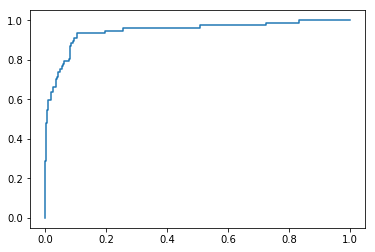

In [23]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y1, pred_y1, pos_label=1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

## Experience, Mortgage변수 제거

In [24]:
feature_columns2 = feature_columns.difference(['Experience','Mortgage'])
print(feature_columns)
x2 = ploan_processed[feature_columns2]
y2 = ploan_processed['Personal Loan']

Index(['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience',
       'Family', 'Income', 'Mortgage', 'Online', 'Securities Account',
       'const'],
      dtype='object')


In [25]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, stratify=y2, train_size=0.7, test_size=0.3, random_state=42)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [26]:
model2 = sm.Logit(train_y2, train_x2)
results2 = model2.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [28]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                  0.6030
Time:                        18:45:06   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
                                        LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [27]:
# 이전모델과 비교   다시할필요 변수명 변경해서 ***
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                  0.6029
Time:                        18:44:52   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
                                        LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [30]:
# 예측
pred_y2 = results2.predict(test_x2)

In [33]:
pred_Y2 = cut_off(pred_y2, 0.5)
len(pred_Y2[pred_Y2==1])

61

In [34]:
cfmat = confusion_matrix(test_y2, pred_Y2)
print(cfmat)
acc(cfmat)

[[660  13]
 [ 29  48]]


0.944

In [36]:
# Threshold값에 따른 성능지표 비교

threshold = np.arange(0,1,0.1)
table2 = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y2 = cut_off(pred_y2, i)
    cfmat = confusion_matrix(test_y2, pred_Y2)
    table2.loc[i] = acc(cfmat)
table2.index.name = 'threshold'
table2.columns.name = 'Performance'
table2

Performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


In [38]:
table1

Performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC :  0.9465467667547905


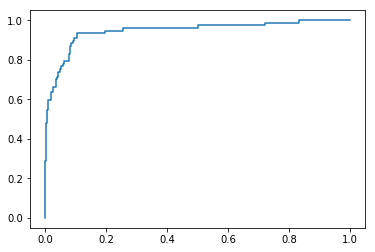

In [41]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y2, pred_y2, pos_label=1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

## 두개의 변수를 제거한 뒤 결과 비교

In [39]:
## 두개의 변수를 제거했지만 정확도가 크게 증가하지 않았다.
## 두개의 변수가 y값을 설명하는데 크게 영향이 없었고
## 나머지 변수들의 pvalue가 크게 변하지 않았음을 통해 두개의 변수가 
## 나머지 변수와 공통적인 부분을 별로 가지고 있지않음을 의미한다.

# 변수선택법

In [42]:
feature_columns = ploan_processed.columns.difference(['Personal Loan'])
x = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']  # 대출여부 0 or 1

In [43]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [44]:
def processSubset(x,y,feature_set):
    model = sm.OLS(y,x[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {"model":regr, "AIC":AIC}

'''
전진선택법
'''
###### 전진선택법 ( step=1 )
# predictor : 현재 선택되어 있는 변수
def forward(x,y,predictors):
    # 데이터 변수들이 미리정의된 predictor에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(x=x, y=y, feature_set = predictors+[p]+['const']))
    #데이터 프레임으로 변환
    models = pd.DataFrame(results)
    
    #AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ",models.shape[0], "models on",len(predictors)+1,"predictors in", (toc-tic), "seconds ")
    print("Selected predictors: ",best_model['model'].model.exog_names, ' AIC: ',best_model[0])
    return best_model

### 전진선택법 모델
def forward_model(x,y):
    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0-9 ->1-10
    for i in range(1,len(x.columns.difference(['const'])) + 1):
        Forward_result = forward(x=x,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC']>Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k!='const']
    toc=time.time()
    print('Total elapsed time: ', (toc-tic), 'seconds ')
    
    return (Fmodels['model'][len(Fmodels['model'])])

'''
후진소거법
'''
##### 후진소거법(step=1)
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x=x,y=y,feature_set = list(combo)+['const']))
        
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc=time.time()
    print("Processed ",models.shape[0], "models on",len(predictors)-1,"predictors in", (toc-tic), "seconds ")
    print("Selected predictors: ",best_model['model'].model.exog_names, ' AIC: ',best_model[0])
    return best_model

### 후진 소거법 모델
def backward_model(x,y):
    Bmodels = pd.DataFrame(columns=["AIC","model"],index=range(1,len(x.columns)))
    tic = time.time()
    predictors = x.columns.difference(['const'])
    # 전진선택법때와 다르게 predictor조합을 다 채워진 상태에서 시작
    Bmodel_before = processSubset(x,y,predictors)['AIC']
    while(len(predictors) > 1):
        Backward_result = backward(x=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print("Total elapsed time: ", ( toc-tic), "seconds")
    return (Bmodels['model'].dropna().iloc[0])

'''
단계적선택법
'''
#### forward model과 backward model 번갈아가며 사용
def Stepwise_model(x,y):
    Stepmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors=[]
    Smodel_before = processSubset(x,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0-9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        Forward_result = forward(x=x, y=y, predictors = predictors)
        print("forward")
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(x=x, y=y, predictors=predictors)
        if Backward_result['AIC']<Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k !="const"]
            print("backward")
        if Stepmodels.loc[i]['AIC']>Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print("Total elapsed time : ",(toc-tic),"seconds" )
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [46]:
Forward_best_model = forward_model(x=train_x, y=train_y)

C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Processed  11 models on 1 predictors in 0.07480978965759277 seconds 
Selected predictors:  ['Income', 'const']  AIC:  239.9207874222875
Processed  10 models on 2 predictors in 0.057845115661621094 seconds 
Selected predictors:  ['Income', 'CD Account', 'const']  AIC:  92.75806832710532
Processed  9 models on 3 predictors in 0.052902936935424805 seconds 
Selected predictors:  ['Income', 'CD Account', 'Education', 'const']  AIC:  -32.73874624530072
Processed  8 models on 4 predictors in 0.0459439754486084 seconds 
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const']  AIC:  -83.87480926714943
Processed  7 models on 5 predictors in 0.04787135124206543 seconds 
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'const']  AIC:  -96.44896666582645
Processed  6 models on 6 predictors in 0.034912824630737305 seconds 
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'CreditCard', 'const'

In [47]:
Backward_best_model = backward_model(x=train_x, y=train_y)

Processed  11 models on 10 predictors in 0.06282782554626465 seconds 
Selected predictors:  ['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Online', 'Securities Account', 'const']  AIC:  -110.71496504103106
Processed  10 models on 9 predictors in 0.07181382179260254 seconds 
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Online', 'Securities Account', 'const']  AIC:  -112.07572514896219
Processed  9 models on 8 predictors in 0.04991626739501953 seconds 
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Online', 'Securities Account', 'const']  AIC:  -113.29446837263731
Processed  8 models on 7 predictors in 0.04783177375793457 seconds 
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Securities Account', 'const']  AIC:  -112.47797117459322
Total elapsed time:  0.2533257007598877 seconds


C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [48]:
Stepwise_best_model = Stepwise_model(x=train_x, y=train_y)

C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Processed  11 models on 1 predictors in 0.05684852600097656 seconds 
Selected predictors:  ['Income', 'const']  AIC:  239.9207874222875
forward
Processed  1 models on 0 predictors in 0.007979393005371094 seconds 
Selected predictors:  ['const']  AIC:  789.479659173553
Processed  10 models on 2 predictors in 0.04866337776184082 seconds 
Selected predictors:  ['Income', 'CD Account', 'const']  AIC:  92.75806832710532
forward
Processed  2 models on 1 predictors in 0.01496124267578125 seconds 
Selected predictors:  ['Income', 'const']  AIC:  239.9207874222875
Processed  9 models on 3 predictors in 0.04487872123718262 seconds 
Selected predictors:  ['Income', 'CD Account', 'Education', 'const']  AIC:  -32.73874624530072
forward
Processed  3 models on 2 predictors in 0.014920711517333984 seconds 
Selected predictors:  ['Income', 'CD Account', 'const']  AIC:  92.75806832710532
Processed  8 models on 4 predictors in 0.03490328788757324 seconds 
Selected predictors:  ['Income', 'CD Account', 'E

In [59]:
# 모델에 의해 예측된 값 테스트
# 모델마다 뽑아낸 변수로 테스트를 해야된다
pred_y_full = results1.predict(test_x1)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [60]:
pred_Y_full = cut_off(pred_y_full,0.5)
pred_Y_forward = cut_off(pred_y_forward, 0.5)
pred_Y_backward = cut_off(pred_y_backward, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [61]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [62]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

# 성능에 큰 차이가 없으므로 변수를 제거한 모델을 채택한다
# pvalue가 큰 변수 두개를 제거한 모델을 사용하자

0.9466666666666667
0.932
0.932
0.932


In [63]:
print(len(results2.model.exog_names), len(Forward_best_model.model.exog_names)
,len(Backward_best_model.model.exog_names), len(Stepwise_best_model.model.exog_names))

10 9 9 9


AUC :  0.9463923891858513


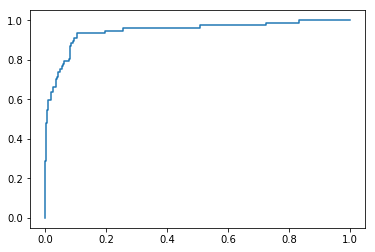

In [64]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y1, pred_y1, pos_label=1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC : ', auc)